<!--
import data_analytics.github as github
print(github.create_jupyter_notebook_header("markcrowe-com", "agriculture-data-analytics", "notebooks/notebook-3-03-ml-milk-production.ipynb", "master"))
-->
<table style="margin: auto;"><tr><td><a href="https://mybinder.org/v2/gh/markcrowe-com/agriculture-data-analytics/master?filepath=notebooks/notebook-3-03-ml-milk-production.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></td><td>online editors</td><td><a href="https://colab.research.google.com/github/markcrowe-com/agriculture-data-analytics/blob/master/notebooks/notebook-3-03-ml-milk-production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></td></tr></table>

# Statistical Analysis
# Objective
       - Implement Statistical analysis on Milk Production value.
       - Data: Value at Current Prices for Output, Input and Income in Agriculture
       - Source: Central Statistics office CSO, Downloaded https://data.cso.ie/table/AEA01

Hypothesis Testing: 
    
    - H0 Null Hypotheseis: There is no difference between sample set and popuation.
    - H1 Alternative : There is a difference between sample set and population.
    - reject H0 if we have enough statistical evidence
    - enough statistical evidence p-value less than threshhold of 0.05
    - p-value : probability the result is due to chance and not a general result
    - the less p-value the better

## Import required libraries

In [16]:
import pandas as pd
#!pip install pingouin
#!pip install plotly
import pingouin as pg
import scipy.stats as stats
import math
import plotly.express as px

     |████████████████████████████████| 26.5 MB 8.4 MB/s            
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


## Read Data

In [85]:
df = pd.read_csv("./../artifacts/TA_inputoutputvalue_1990_2021_CSO.csv")

## Extract milk production dataset
# drop redundunt columns
df = df.drop('Unnamed: 0',axis = 1)

# extract milk dataset
df_milk = df[['Year',
#              'UNIT',
              'All Livestock Products - Milk',
              'Taxes on Products',
              'Subsidies on Products',
              'Compensation of Employees',
              'Contract Work',
              'Entrepreneurial Income',
              'Factor Income',
              'Fixed Capital Consumption - Farm Buildings',
              'Fixed Capital Consumption - Machinery, Equipment, etc',
              'Interest less FISIM',
              'Operating Surplus',
              'Livestock - Cattle',
              'Livestock - Sheep',
              'Land Rental',
              'Intermediate Consumption - Contract Work',
              'Intermediate Consumption - Crop Protection Products',
              'Intermediate Consumption - Energy and Lubricants',
              'Intermediate Consumption - Feeding Stuffs',
              'Intermediate Consumption - Fertilisers',
              'Intermediate Consumption - Financial Intermediation Services Indirect',
              'Intermediate Consumption - Forage Plants',
              'Intermediate Consumption - Maintenance and Repairs',
              'Intermediate Consumption - Seeds',
              'Intermediate Consumption - Services',
              'Intermediate Consumption - Veterinary Expenses',
              'Intermediate Consumption - Other Goods (Detergents, Small Tools, etc)',
              'Intermediate Consumption - Other Goods and Services'
              
             ]]
# Assign year as index
df_milk.set_index('Year',drop=True,inplace=True)
# rename column
df_milk = df_milk.rename(columns={'All Livestock Products - Milk':'Milk Production'})


#print("Milk production dataset dimenssions \n", df_milk.shape,'\n')
#print( df_milk.info())

# chosse only Milk production column
df_milk = df_milk['Milk Production']
fig = px.bar(df_milk,title='Irish Milk Production Value over Time - Thousands Euro')
fig.show()

## Descriptive Statistics

In [95]:
# Tendency and Spread
print('Summary Statistics\n\n', df_milk.describe())
print('\nSkewness level' ,round(df_milk.skew(),2))
print('\nKurtoses level',round(df_milk.kurt(),2))

#px.box(df_milk,title='Distribution')

px.violin(df_milk,box=True,points='all',title='Milk production Value Distribution 1990-2021')

Summary Statistics

 count      32.000000
mean     1726.503125
std       522.065568
min      1106.500000
25%      1414.125000
50%      1537.250000
75%      1846.375000
max      3376.600000
Name: Milk Production, dtype: float64

Skewness level 1.63

Kurtoses level 2.26


In [96]:
fig = px.ecdf(df_milk,ecdfnorm='percent'
             ,title='Milk production Value Empirical Comulative Distribution 1990-2021')
fig.show()

## Normality Test

                        W     pval  normal
Milk Production  0.799584  0.00004   False


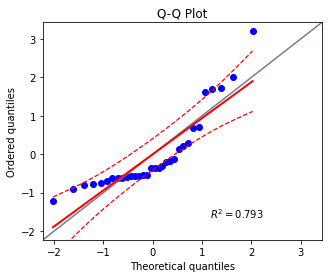

In [97]:
# Test Normality via Shapiro-Wilk test of Normality
print(pg.normality(df_milk))
# Test Normality via QQplot
ax = pg.qqplot(df_milk, dist='norm')

    - Shapiro-Wilk test reported p-value of 0.00004
    - p-value < aplha value of 0.05
    - we have enoughe statistical evidence to reject Null hypothesis Milk production is normaly distributed
    - QQplot confirms non-Normal distribution values with outliers
    - NonParamatric tests are recomended to be perofrmed

In [53]:
stats.ttest_1samp(df_milk.iloc[25:], # sample data
                 df_milk.iloc[20:25].mean()) # population mean)


Ttest_1sampResult(statistic=3.3101215633905845, pvalue=0.016202288121086754)